In [1]:
## Reference
# https://mubaris.com/posts/linear-regression/

#http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

In [8]:
## LIBRARIES

import numpy as np
import pandas as pd
import math
import random
from collections import Counter
from numpy.linalg import inv

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
## LOAD DATA
data = pd.read_csv('spambase_data.txt', sep = ",",header=None)

for col in data.iloc[:,:-1]:
    stdev = np.std(data[col])
    col_mean = data[col].mean()
    print(col)
    for i in range(len(data)):
        data.iloc[i,col] = (data[col][i] - col_mean)/stdev
        
#     #data[col] = col
    

x0 = np.ones(len(data))
#data['b'] = pd.Series(x0)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [4]:
##K-FOLDS

k = 5
fold_size = math.ceil(len(data) / k)
dataset_split = list()
ind_count = 0
for i in range(k):
    #print(i)
    dataset_split.append(data.iloc[ind_count:ind_count+fold_size,:])
    ind_count = ind_count + fold_size + 1
    
def create_train_test(train_ind, test_ind):
    train = pd.DataFrame()
    test = pd.DataFrame()
    for i in train_ind:
        train = train.append(dataset_split[i])
    #for i in test_ind:
    test = test.append(dataset_split[test_ind])
    return(train, test)

In [12]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def init_log_reg(k, train_ind, test_ind, iterations, alpha):
    print("Epoch " + str(k+1))
    
    train,test = create_train_test(train_ind, test_ind)

    train_x = train.iloc[:,0:57]
    train_y = train.iloc[:,57]
    
    
    test_x = test.iloc[:,0:57]
    test_y = test.iloc[:,57]
    
    #print(Counter(train_y))
    #print(Counter(test_y))
    
    Y = np.array(train_y, dtype=np.float64)
    X = np.array(train_x, dtype=np.float64)
    
    Y_test = np.array(test_y)
    X_test = np.array(test_x)
    
    weights = np.zeros(57)
    
    past_costs = []
    past_thetas = [weights]
    
    for i in range(iterations):
        scores = np.dot(X, weights)
        predictions = sigmoid(scores)
        error = predictions - Y
        cost = np.dot(error.T, error)
        past_costs.append(cost)
        
        # Update weights with gradient
        gradient = np.dot(X.T, error)
        #weights += alpha * gradient
        weights = weights - (alpha * np.dot(X.T, error))
        past_thetas.append(weights)
        
        # Print log-likelihood every so often
#         if i % 10000 == 0:
#             print(log_likelihood(X, Y, weights))
         
    Y_pred = sigmoid(np.dot(X, weights))
    #print('Train MSE: ' + str(mse(Y, Y_pred)))
    
    test_pred = sigmoid(np.dot(X_test, weights))
    #test_mse = mse(Y_test, test_pred)
    tp,fp,tn,fn = accuracy(Y, Y_pred, .65)
    print ("Train Accuracy: " + str((tp+tn)/(tp+tn+fp+fn)))
    
    tp,fp,tn,fn = accuracy(Y_test, test_pred, .65)
    print ("Test Accuracy: " + str((tp+tn)/(tp+tn+fp+fn)))
    
    
    
    #print('Test MSE: ' + str(test_mse))
    roc_auc(Y_test, test_pred)
    
    #return(test_mse, tp, fp, tn, fn)
    return(tp, fp, tn, fn)
    
    #return past_weights, past_costs

In [9]:
def roc_auc(y_test, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    print(fpr)
    print(tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


# Model Evaluation - MSE
def mse(Y, Y_pred):
    mse = sum((Y - Y_pred) ** 2) / len(Y)
    return mse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def accuracy(Y, Y_pred, threshold):   
    tp,fp,tn,fn = 0,0,0,0
    for i in range(len(Y)):
        if(Y[i] == 1 and Y_pred[i] >= threshold):
            #print(Y[i])
            tp += 1
        elif(Y[i] == 1 and Y_pred[i] < threshold):
            #print(Y[i])
            fn += 1
        elif(Y[i] == 0 and Y_pred[i] < threshold):
            tn += 1
        elif(Y[i] == 0 and Y_pred[i] >= threshold):
            fp += 1
#     print(tp)
#     print(fp)
#     print(tp+fp+fn+tn)

    return tp,fp,tn,fn

Epoch 1
Train Accuracy: 0.9219260065288357
Test Accuracy: 0.748099891422367
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[0.00434311 0.03908795 0.0412595  0.04343105 0.04560261 0.04777416
 0.04994571 0.05320304 0.05537459 0.06514658 0.06840391 0.07274701
 0.07600434 0.08903366 0.09120521 0.1237785  0.12703583 0.17806732
 0.18023887 0.1834962  0.18566775 0.21498371 0.21824104 0.22149837
 0.22366992 0.24864278 0.25081433 0.2844734  0.28664495 0.3029316
 0.30510315 0.36373507 0.36590662 0.38327904 0.3854506  0.39413681
 0.39630836 0.4082519  0.41042345 0.45385451 0.45602606 0.47557003
 0.47774159 0.48317047 0.4864278  0.4907709  0.49294245 0.57980456
 0.58197611 0.

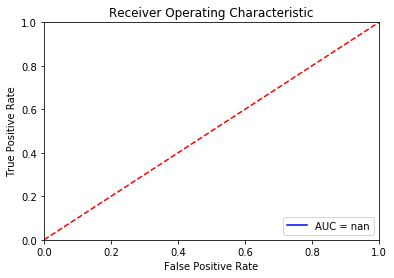

Epoch 2
Train Accuracy: 0.9224700761697497
Test Accuracy: 0.7795874049945711
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.0666666

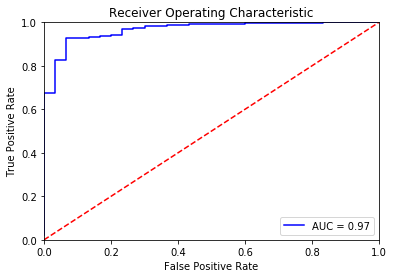

Epoch 3
Train Accuracy: 0.911588683351469
Test Accuracy: 0.9619978284473398
[0.         0.00108578 0.00760043 0.00977199 0.01302932 0.01737242
 0.04668838 0.04885993 0.05320304 0.06297503 0.06514658 0.11509229
 0.11726384 0.15960912 0.16178067 0.19001086 0.19218241 0.23344191
 0.23561346 0.31921824 0.32138979 0.37024973 0.37242128 0.40716612
 0.40933768 0.45819761 0.46254072 0.52334419 0.52551574 0.63843648
 0.64060803 0.64929425 0.6514658  0.69815418 0.70032573 0.74809989
 0.75135722 0.77633008 0.77850163 0.83387622 0.83604777 0.84581976
 0.84799131 0.86319218 0.86536374 0.91096634 0.91313789 0.92399566
 0.92616721 0.92942454 0.93159609 0.94788274 0.95331162 0.96416938
 0.96634093 0.96742671 0.96959826 0.97285559 0.97502714 0.9815418
 0.98588491 0.98914224 0.99131379 0.99674267 1.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan

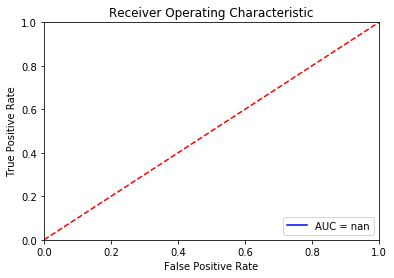

Epoch 4
Train Accuracy: 0.9088683351468988
Test Accuracy: 0.9120521172638436
[0.         0.00217155 0.02931596 0.06731813 0.09446254 0.09663409
 0.11183496 0.11726384 0.13463626 0.13897937 0.19761129 0.20086862
 0.20738328 0.20955483 0.21064061 0.21498371 0.21715527 0.21932682
 0.22258415 0.2247557  0.22801303 0.23235613 0.23561346 0.24429967
 0.25515744 0.26927253 0.27144408 0.43865364 0.44082519 0.44842562
 0.45059718 0.45819761 0.46036916 0.64820847 0.65038002 0.76112921
 0.76330076 0.7752443  0.77741585 0.84690554 0.84907709 0.86644951
 0.86862106 0.8946797  0.89685125 0.96525516 0.96742671 0.97068404
 0.97394137 0.97828447 0.98045603 0.9815418  0.98371336 1.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


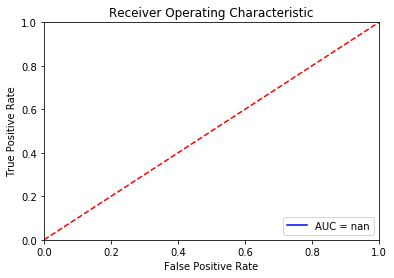

Epoch 5
Train Accuracy: 0.9334961997828447
Test Accuracy: 0.8652792990142387
[0.         0.01752464 0.15334064 0.15662651 0.46768894 0.46987952
 0.49835706 0.50164294 0.5060241  0.50821468 0.51259584 0.59255203
 0.59474261 0.63636364 0.63855422 0.96933187 0.97152245 1.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


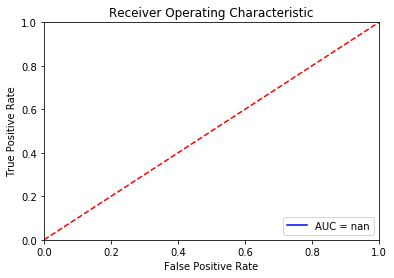

In [13]:
#LOOCV
total_mse = 0
alpha = .0001 #Step size
iterations = 20000 #No. of iterations

error_table = pd.DataFrame(columns=["tp", "fp", "tn", "fn"])#, "acc"])


for i in range(k):
    test_ind = i
    train_ind = [x for x in range(k) if x!=i]
    #mse, tp, fp, tn, fn = init_log_reg(i, train_ind, test_ind, iterations, alpha)
    tp, fp, tn, fn = init_log_reg(i, train_ind, test_ind, iterations, alpha)
    #total_mse += mse
    error_table = error_table.append({
     "tp": tp,
     "fp": fp,
     "tn": tn,
     "fn": fn
     #"acc": (tp+tn)/(tp+fp+fn+tn)
      }, ignore_index=True)

#print("Average Test MSE: " + str(total_mse/k))

In [11]:
#Confusion Matrix
conf_mat = pd.DataFrame(columns=["tp", "fp", "tn", "fn"])
conf_mat = conf_mat.append({
 "tp": error_table['tp'].sum(),
 "fp": error_table['fp'].sum(),
 "tn": error_table['tn'].sum(),
 "fn": error_table['fn'].sum()
 #"acc": (tp+tn)/(tp+fp+fn+tn)
  }, ignore_index=True)
conf_mat

,tp,fp,tn,fn
0,1378,240,2545,434
